# Regression Analysis of Temporal Processes (Class 4) - First Difference, Fixed Effects

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. An OLS example: Taxes and income

### Load in data

In [2]:
pan = pd.read_csv('panel-for-R.csv')

variables = ["tax", "idnum", "panelwave", "age", "sex", "realinc", "race", "region", "coop", "happy", "wrkstat", "marital"]

sub = pan.loc[:, variables]

### Taxes

In [3]:
# make reverse-coded version of 'tax' called 'toohigh'

sub['toohigh'] = 4 - sub['tax']

sub.groupby(['toohigh', 'tax']).size()

toohigh  tax
1.0      3.0      35
2.0      2.0    1356
3.0      1.0    1805
dtype: int64

### The naive OLS results
(slide 9)

In [4]:
lm1 = smf.ols('toohigh ~ np.log(realinc) + C(panelwave)', data = sub).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                toohigh   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.284
Date:                Sun, 12 Aug 2018   Prob (F-statistic):            0.00124
Time:                        23:25:55   Log-Likelihood:                -2182.6
No. Observations:                2856   AIC:                             4373.
Df Residuals:                    2852   BIC:                             4397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2662      0.095     23.831      0.000       2.080       2.453
C(panelwave)[T.2]    -0.0142      0.023     -0.619      0.536      -0.059       0.031
C(panelwave)[T.3]    -0.0550      0.024     -2.273      0.023      -0.102      -0.008
np.log(realinc)       0.0300      0.009      3.209      0.001       0.012       0.048
==============================================================================
Omnibus:                     2564.366   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.036
Skew:                          -0.445   Prob(JB):                     1.03e-58
Kurtosis:                       1.795   Cond. No.                         99.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The naive OLS results, with clustered SE's
(slide 10)

For regressions with panel data, we use the `linearmodels` module, which is an extension of `statsmodels`. 

First we need to turn our Pandas dataframe `sub` into a multiindex dataframe by setting `idnum` and `panelwave` as indices. Since `panelwave` will be used as a variable in the model, we need to keep it as a variable in the dataframe as well. 

In [5]:
sub = sub.set_index(['idnum', 'panelwave'], drop=False)

In [6]:
from linearmodels import PooledOLS
lm1 = PooledOLS.from_formula('toohigh ~ 1 + np.log(realinc) + C(panelwave)', data = sub).fit(cov_type = 'clustered', cluster_entity = True)
lm1

/Users/melindasong/anaconda/lib/python3.5/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Dep. Variable:,toohigh,R-squared:,0.0055
Estimator:,PooledOLS,R-squared (Between):,0.0060
No. Observations:,2856,R-squared (Within):,0.0053
Date:,"Sun, Aug 12 2018",R-squared (Overall):,0.0055
Time:,23:26:05,Log-likelihood,-2182.6
Cov. Estimator:,Clustered,,
,,F-statistic:,5.2841
Entities:,1272,P-value,0.0012
Avg Obs:,2.2453,Distribution:,"F(3,2852)"
Min Obs:,1.0000,,
Max Obs:,3.0000,F-statistic (robust):,5.2552


## 3. First differences regression model

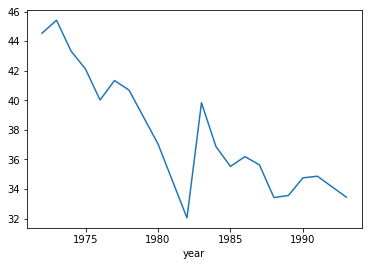

In [270]:
by_year_nat = by_year_region.groupby('year')['marriedlt50_pct'].mean()
by_year_nat.plot()

In [7]:
# slide 39

from linearmodels.panel import FirstDifferenceOLS
fd1 = FirstDifferenceOLS.from_formula('toohigh ~ np.log(realinc) + C(panelwave)', data = sub).fit()
fd1.summary()

#print(fd1.fit(cov_type = 'clustered', cluster_entity = True))

/Users/melindasong/anaconda/lib/python3.5/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


ValueError: Constants are not allowed in first difference regressions.

## 4. Adding controls and strange things

In [8]:
fd2 = FirstDifferenceOLS.from_formula('toohigh ~ age + np.log(realinc)', data = sub)
print(fd2.fit())

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                toohigh   R-squared:                        0.0033
Estimator:         FirstDifferenceOLS   R-squared (Between):             -0.3279
No. Observations:                1535   R-squared (Within):               0.0040
Date:                Sun, Aug 12 2018   R-squared (Overall):             -0.3245
Time:                        23:26:12   Log-likelihood                   -1240.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.5195
Entities:                        1271   P-value                           0.0808
Avg Obs:                       2.2360   Distribution:                  F(2,1533)
Min Obs:                       1.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             2.5195
                            

/Users/melindasong/anaconda/lib/python3.5/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)
/Users/melindasong/anaconda/lib/python3.5/site-packages/linearmodels/panel/model.py:1567: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  y = self.dependent.first_difference()
/Users/melindasong/anaconda/lib/python3.5/site-packages/linearmodels/panel/data.py:568: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex o

In [9]:
fd2 = FirstDifferenceOLS.from_formula('toohigh ~ np.log(realinc) + sex + C(race) + C(marital) + age', \
                                      data = sub)
print(fd2.fit())

ValueError: mismatch between column_names and columns coded by given terms

### Investigating differences

In [10]:
sub['logrealinc'] = np.log(sub.loc[:, 'realinc'])

# create first differences for the `logrealinc` variable using functions available in Pandas
sub['d_logrealinc'] = sub['logrealinc'].groupby(level = 0).diff()

In [11]:
# create indicators for race and marital
sub['race2'] = np.where(sub['race'] == 2, 1, 0)
sub['race3'] = np.where(sub['race'] == 3, 1, 0)

sub['marital2'] = np.where(sub['marital'] == 2, 1, 0)
sub['marital3'] = np.where(sub['marital'] == 3, 1, 0)
sub['marital4'] = np.where(sub['marital'] == 4, 1, 0)
sub['marital5'] = np.where(sub['marital'] == 5, 1, 0)

In [12]:
# create first differences for the following variables
sub['d_sex'] = sub['sex'].groupby(level = 0).diff()
sub['d_age'] = sub['age'].groupby(level = 0).diff()
sub['d_toohigh'] = sub['toohigh'].groupby(level = 0).diff()
sub['d_race2'] = sub['race2'].groupby(level = 0).diff()
sub['d_race3'] = sub['race3'].groupby(level = 0).diff()
sub['d_marital2'] = sub['marital2'].groupby(level = 0).diff()
sub['d_marital3'] = sub['marital3'].groupby(level = 0).diff()
sub['d_marital4'] = sub['marital4'].groupby(level = 0).diff()
sub['d_marital5'] = sub['marital5'].groupby(level = 0).diff()

In [13]:
# look at statistic summary of `d_age`
sub['d_age'].describe()

count    2756.000000
mean        2.014514
std         1.752511
min       -21.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        31.000000
Name: d_age, dtype: float64

In [14]:
# create a subset of the sub dataframe with the following conditions satisfied
constants = sub[(sub['d_age']==2) & (sub['d_sex']==0) & (sub['d_race2']==0) & (sub['d_race3']==0)]

In [15]:
smf.ols('d_toohigh ~ d_logrealinc + d_race2 + d_race3 + d_sex + d_age + d_marital2 + d_marital3 + \
        d_marital4 + d_marital5', data = constants).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              d_toohigh   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.273
Date:                Sun, 12 Aug 2018   Prob (F-statistic):              0.273
Time:                        23:26:42   Log-Likelihood:                -1117.0
No. Observations:                1401   AIC:                             2246.
Df Residuals:                    1395   BIC:                             2277.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0056      0.003     -1.931      0.054      -0.011    8.92e-05
d_logrealinc     0.0155      0.017      0.908      0.364      -0.018       0.049
d_race2       1.709e-17    2.7e-17      0.633      0.527   -3.59e-17    7.01e-17
d_race3      -2.645e-18   1.25e-17     -0.211      0.833   -2.72e-17    2.19e-17
d_sex         1.323e-17   1.03e-17      1.290      0.197   -6.88e-18    3.33e-17
d_age           -0.0112      0.006     -1.931      0.054      -0.023       0.000
d_marital2       0.0732      0.120      0.611      0.541      -0.162       0.308
d_marital3       0.0850      0.078      1.091      0.275      -0.068       0.238
d_marital4      -0.1417      0.093     -1.518      0.129      -0.325       0.041
d_marital5       0.0183      0.083      0.221      0.825      -0.144       0.181
==============================================================================
Omnibus:                       39.790   Durbin-Watson:                   2.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.809
Skew:                           0.044   Prob(JB):                     4.26e-21
Kurtosis:                       4.265   Cond. No.                     2.02e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.71e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 5. How to think about the first differenced model

(slide 58)

In [16]:
sub['toohigh'].value_counts()

3.0    1805
2.0    1356
1.0      35
Name: toohigh, dtype: int64

In [17]:
sub['d_toohigh'].value_counts()

 0.0    1316
-1.0     276
 1.0     225
-2.0       5
 2.0       5
Name: d_toohigh, dtype: int64

In [18]:
sub['logrealinc'].describe()

count    4272.000000
mean       10.011207
std         1.070262
min         5.556828
25%         9.450783
50%        10.149664
75%        10.695999
max        11.892414
Name: logrealinc, dtype: float64

In [19]:
sub['d_logrealinc'].describe()

count    2362.000000
mean       -0.004238
std         0.846324
min        -6.335586
25%        -0.233896
50%        -0.033226
75%         0.250355
max         6.101905
Name: d_logrealinc, dtype: float64

### The issue of variance 
(slide 64)

In [20]:
tax_vars = ['toohigh', 'd_toohigh', 'logrealinc', 'd_logrealinc']

sub[tax_vars].agg('var')

toohigh         0.269090
d_toohigh       0.295496
logrealinc      1.145460
d_logrealinc    0.716265
dtype: float64

### Looking at "locally appropriate"

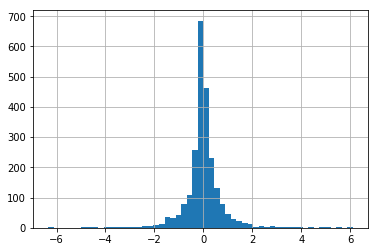

In [21]:
sub['d_logrealinc'].hist(bins = 55)

### What about nonlinear change?

In [22]:
# slide 69
sub['d_logrealinc'].describe()

count    2362.000000
mean       -0.004238
std         0.846324
min        -6.335586
25%        -0.233896
50%        -0.033226
75%         0.250355
max         6.101905
Name: d_logrealinc, dtype: float64

In [23]:
# slide 69
sub['d_log_cat'] = pd.cut(sub['d_logrealinc'], bins = [-7, -.234, -.033, .25, 6.2],
                          labels = ["big loss", "little loss", "little gain", "big gain"])

sub['d_log_cat'].value_counts()

little loss    727
big gain       597
big loss       571
little gain    467
Name: d_log_cat, dtype: int64

In [24]:
sub['d_log_cat'] = sub['d_log_cat'].astype(str)

In [25]:
# slide 70

fd_tax_unbal2 = smf.ols("d_toohigh ~ C(d_log_cat, Treatment(reference='big loss')) + C(panelwave)", \
                        data = sub, missing = 'drop').fit()
fd_tax_unbal2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              d_toohigh   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.941
Date:                Sun, 12 Aug 2018   Prob (F-statistic):              0.101
Time:                        23:26:57   Log-Likelihood:                -1248.5
No. Observations:                1550   AIC:                             2507.
Df Residuals:                    1545   BIC:                             2534.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       -0.0539      0.018     -2.919      0.004      -0.090      -0.018
C(d_log_cat, Treatment(reference='big loss'))[T.big gain]        0.0949      0.039      2.410      0.016       0.018       0.172
C(d_log_cat, Treatment(reference='big loss'))[T.little gain]     0.0616      0.042      1.475      0.141      -0.020       0.143
C(d_log_cat, Treatment(reference='big loss'))[T.little loss]     0.0519      0.037      1.394      0.164      -0.021       0.125
C(panelwave)[T.2]                                               -0.0118      0.017     -0.703      0.482      -0.045       0.021
C(panelwave)[T.3]                                               -0.0421      0.017     -2.512      0.012      -0.075      -0.009
==============================================================================
Omnibus:                       41.067   Durbin-Watson:                   2.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.271
Skew:                          -0.000   Prob(JB):                     2.05e-21
Kurtosis:                       4.215   Cond. No.                     1.86e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.62e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 6. From our first differences model to the fixed effects model

Skipping code on slides that are for teaching purposes only (slides 77 - 88). Start at slide 94.

Use `PanelOLS` from the `linearmodels` module to estimate fixed effects. Add `EntityEffects` to the formula to include entity (fixed) effects in the model. 

In [26]:
from linearmodels import PanelOLS
fe_tax_unbal = PanelOLS.from_formula('toohigh ~ 1 + logrealinc + C(panelwave) + EntityEffects', data = sub).fit()
fe_tax_unbal

/Users/melindasong/anaconda/lib/python3.5/site-packages/linearmodels/utility.py:496: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Dep. Variable:,toohigh,R-squared:,0.0059
Estimator:,PanelOLS,R-squared (Between):,0.0046
No. Observations:,2856,R-squared (Within):,0.0059
Date:,"Sun, Aug 12 2018",R-squared (Overall):,0.0046
Time:,23:27:04,Log-likelihood,-505.60
Cov. Estimator:,Unadjusted,,
,,F-statistic:,3.1105
Entities:,1272,P-value,0.0255
Avg Obs:,2.2453,Distribution:,"F(3,1581)"
Min Obs:,1.0000,,
Max Obs:,3.0000,F-statistic (robust):,3.1105


### Pooled logistic regression 
(slide 103)

By default, `numpy` counts NaN as 0. So we need to specifically tell our conditional function to treat the NaN values separately.  

In [27]:
sub['toohighest'] = np.where(pd.isnull(sub['toohigh']), np.nan, np.where(sub['toohigh'] > 2, 1, 0))
sub['toohighest'].value_counts()

1.0    1805
0.0    1391
Name: toohighest, dtype: int64

In [28]:
logit1 = smf.glm('toohighest ~ logrealinc + C(panelwave)', data = sub, family=sm.families.Binomial()).fit()
logit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             toohighest   No. Observations:                 2856
Model:                            GLM   Df Residuals:                     2852
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1950.6
Date:                Sun, 12 Aug 2018   Deviance:                       3901.1
Time:                        23:27:08   Pearson chi2:                 2.86e+03
No. Iterations:                     4   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7912      0.369     -2.142      0.032      -1.515      -0.067
C(panelwave)[T.2]    -0.0666      0.089     -0.747      0.455      -0.242       0.108
C(panelwave)[T.3]    -0.2437      0.094     -2.599      0.009      -0.428      -0.060
logrealinc            0.1117      0.036      3.069      0.002       0.040       0.183
=====================================================================================
"""

In [29]:
np.exp(logit1.params)

Intercept            0.453310
C(panelwave)[T.2]    0.935530
C(panelwave)[T.3]    0.783684
logrealinc           1.118206
dtype: float64

### The conditional logistic regression

The modules available in Python to perform conditional logistic regression have limited use cases. We can use the `rpy2` module to establish connection with R, and use the `clogit` function available in the `survival` package. 

The `rpy2` module provides a Python interface to the R language. First we import `rpy2` and call the necessary extension `%load_ext rpy2.ipython`.

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
from rpy2.robjects.packages import importr
survival = importr('survival')
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


<br>

`%%` means that the entire cell will be evaluated in R mode. `-i` is to import existing variable in the environment. Here we check our dataframe `d` and see that in R mode, the columns have been automatically renamed: 

In [34]:
%%R -i sub

clogit1 = clogit(I(toohighest==1) ~ logrealinc + as.factor(panelwave) + strata(idnum), data=sub)
summary(clogit1)

Call:
coxph(formula = Surv(rep(1, 6000L), I(toohighest == 1)) ~ logrealinc + 
    as.factor(panelwave) + strata(idnum), data = sub, method = "exact")

  n= 2856, number of events= 1600 
   (3144 observations deleted due to missingness)

                         coef exp(coef) se(coef)      z Pr(>|z|)   
logrealinc             0.1495    1.1612   0.1321  1.132  0.25782   
as.factor(panelwave)2 -0.1199    0.8870   0.1333 -0.900  0.36831   
as.factor(panelwave)3 -0.4641    0.6287   0.1419 -3.271  0.00107 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                      exp(coef) exp(-coef) lower .95 upper .95
logrealinc               1.1612     0.8612    0.8964    1.5043
as.factor(panelwave)2    0.8870     1.1274    0.6831    1.1518
as.factor(panelwave)3    0.6287     1.5905    0.4761    0.8303

Rsquare= 0.004   (max possible= 0.216 )
Likelihood ratio test= 12.63  on 3 df,   p=0.005511
Wald test            = 12.33  on 3 df,   p=0.006331
Score (logrank) test = 12.